In [ ]:
# This project utilizes 2 different datasets - Air Pollution Data consisting of one large CSV, and Crime Data composed 
# of 3 CSVs contatining different crime metrics. The Clean up process was fairly similar for all 4 files and involed 
# dropping select irrelecant columns, replacing NaN values to make data cleaner, renaming few select columns
# and more readable and grouping data/setting indexes. 
# Crime stats also required the use of Melt function to make the Data tidier and prepare it to be put into databases. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
low_memory = False
import random

In [23]:
# Connecting to CSVs
motive_data = pd.read_csv("old_csv/19_Motive.csv")
victim_data = pd.read_csv("old_csv/32_Victim.csv")
firearms_data = pd.read_csv("old_csv/34_Firearm.csv")
air_data = pd.read_csv("old_csv/data.csv",encoding = "ISO-8859-1")

C:\Users\RF18\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning up Air Pollution Data

In [3]:
# Dropping irrelevant Columns
df_air_data = pd.DataFrame(air_data)
df_air_data = df_air_data.set_index('state')
clean_air_data = df_air_data.drop([ "sampling_date","agency","type","location_monitoring_station"],1)
clean_air_data.head()

,stn_code,location,so2,no2,rspm,spm,pm2_5,date
state,,,,,,,,
Andhra Pradesh,150,Hyderabad,4.8,17.4,NaN,NaN,NaN,1990-02-01
Andhra Pradesh,151,Hyderabad,3.1,7.0,NaN,NaN,NaN,1990-02-01
Andhra Pradesh,152,Hyderabad,6.2,28.5,NaN,NaN,NaN,1990-02-01
Andhra Pradesh,150,Hyderabad,6.3,14.7,NaN,NaN,NaN,1990-03-01
Andhra Pradesh,151,Hyderabad,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [4]:
# Separating Year and Month into Separate columns
clean_air_data['Year'] = clean_air_data['date'].str[:4]
clean_air_data['Month'] = clean_air_data['date'].str[-5:-3]
clean_air_data['Day'] = clean_air_data['date'].str[-2:]
clean_air_data.head()

,stn_code,location,so2,no2,rspm,spm,pm2_5,date,Year,Month,Day
state,,,,,,,,,,,
Andhra Pradesh,150,Hyderabad,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990,02,01
Andhra Pradesh,151,Hyderabad,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990,02,01
Andhra Pradesh,152,Hyderabad,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990,02,01
Andhra Pradesh,150,Hyderabad,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990,03,01
Andhra Pradesh,151,Hyderabad,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990,03,01


In [5]:
# Filtering the data to dates we need
clean_air_data["date"]=pd.to_datetime(clean_air_data["date"])
dates = (clean_air_data["date"] > "12-31-2000") & (clean_air_data["date"] <= "12-31-2009")
clean_air_data = clean_air_data.loc[dates]

# Replacing the NaNs
clean_air_data.fillna(value='Null', inplace=True)

In [6]:
#replacing state with primary key - unique state id
prim_key=pd.read_csv('primary_key_db.csv')
clean_air = clean_air_data.merge(prim_key, on = 'state')
clean_air.reset_index()
air_quality = clean_air.drop(["state","date","pm2_5"],1)


In [7]:
#this csv only has primary key and no state names
air_quality.set_index('state_id')
air_quality.to_csv('Main_Pollution.csv')

In [87]:
# Grouping Data by Year to get an average per year and see bigger picture
grouped_air_data = air_quality.groupby(["Year"])
grouped_air_data

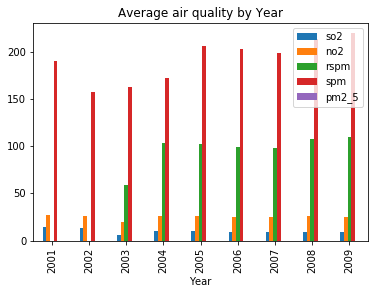

In [29]:
# Plotting average pollution levels by year
grouped_air_data.plot.bar(title = "Average air quality by Year")

# Cleaning up Motive Data

In [33]:
# Generating DataFrame, setting index to the Area Name and replacing NaN values with 0
df_motive_data = pd.DataFrame(motive_data)
#df_motive_data = df_motive_data.set_index('Area_Name')
df_motive_data.fillna(value=0, inplace=True)
df2_mot_data = df_motive_data.rename(columns={"Area_Name": "state"})


In [34]:
# Dropping irrelevant Columns
df2_mot_data=df2_mot_data.drop(['CHNAMurder_Cause_Total','Murder_Cause_Total'],1)
df2_mot_data.head()


,state,Year,CHNAMurder_Cause_By_TerroristExtremist,CHNAMurder_Cause_Casteism,CHNAMurder_Cause_Class_Conflict,CHNAMurder_Cause_Communalism,CHNAMurder_Cause_Dowry,CHNAMurder_Cause_For_Political_reason,CHNAMurder_Cause_Gain,CHNAMurder_Cause_Love_AffairsSexual_Relations,...,Murder_Cause_Communalism,Murder_Cause_Dowry,Murder_Cause_For_Political_reason,Murder_Cause_Gain,Murder_Cause_Love_AffairsSexual_Relations,Murder_Cause_Lunacy,Murder_Cause_Other_Causes_or_Motives,Murder_Cause_Personal_Vendetta_or_Enmity,Murder_Cause_Property_Dispute,Murder_Cause_Witchcraft
0,Odisha,2007,0,11,0,0,2,0,0,0,...,0,138,4,60,61,1,755,113,43,28
1,Jharkhand,2002,0,3,2,2,13,3,7,9,...,0,70,25,103,158,3,599,242,228,26
2,Jharkhand,2004,0,3,2,2,13,3,7,9,...,0,70,25,103,158,3,599,242,228,26
3,Bihar,2010,0,2,2,0,11,0,47,35,...,0,168,24,352,187,5,1228,441,916,2
4,Karnataka,2002,0,1,0,0,0,0,0,1,...,4,52,6,55,130,0,1093,188,98,0


In [37]:
prim_key=pd.read_csv('primary_key_db.csv')
df3_mot_data = df2_mot_data.merge(prim_key, on = 'state')
df3_mot_data.set_index('state_id')

,state,Year,CHNAMurder_Cause_By_TerroristExtremist,CHNAMurder_Cause_Casteism,CHNAMurder_Cause_Class_Conflict,CHNAMurder_Cause_Communalism,CHNAMurder_Cause_Dowry,CHNAMurder_Cause_For_Political_reason,CHNAMurder_Cause_Gain,CHNAMurder_Cause_Love_AffairsSexual_Relations,...,Murder_Cause_Communalism,Murder_Cause_Dowry,Murder_Cause_For_Political_reason,Murder_Cause_Gain,Murder_Cause_Love_AffairsSexual_Relations,Murder_Cause_Lunacy,Murder_Cause_Other_Causes_or_Motives,Murder_Cause_Personal_Vendetta_or_Enmity,Murder_Cause_Property_Dispute,Murder_Cause_Witchcraft
state_id,,,,,,,,,,,,,,,,,,,,,
3033,Odisha,2007,0,11,0,0,2,0,0,0,...,0,138,4,60,61,1,755,113,43,28
3033,Odisha,2001,0,0,0,0,10,0,1,1,...,0,133,17,37,51,0,523,145,49,30
3033,Odisha,2002,0,0,0,0,6,0,0,2,...,0,168,11,42,50,0,575,140,46,39
3033,Odisha,2003,0,0,0,0,36,0,9,3,...,0,169,4,38,61,0,533,149,52,26
3033,Odisha,2004,0,0,0,0,1,0,2,2,...,0,163,2,41,63,0,596,115,45,22
3033,Odisha,2005,0,0,0,0,5,0,4,2,...,0,191,3,45,56,1,539,159,57,25
3033,Odisha,2006,0,0,0,0,2,0,0,1,...,0,74,1,39,55,0,799,116,38,36
3033,Odisha,2008,0,0,0,0,3,0,0,0,...,5,289,3,64,51,0,650,101,55,23
3033,Odisha,2009,0,0,0,0,1,0,0,0,...,0,269,6,36,58,0,622,150,70,28


In [40]:
# Melting DataFrame into Tidy Format, database-friendly format
formatted_df = pd.melt(df3_mot_data, id_vars=['state','Year','state_id'], value_vars=['CHNAMurder_Cause_By_TerroristExtremist',
'CHNAMurder_Cause_Casteism',
'CHNAMurder_Cause_Class_Conflict',
'CHNAMurder_Cause_Communalism',
'CHNAMurder_Cause_Dowry',
'CHNAMurder_Cause_For_Political_reason',
'CHNAMurder_Cause_Gain',
'CHNAMurder_Cause_Love_AffairsSexual_Relations',
'CHNAMurder_Cause_Lunacy',
'CHNAMurder_Cause_Other_Causes_or_Motives',
'CHNAMurder_Cause_Personal_Vendetta_or_Enmity',
'CHNAMurder_Cause_Property_Dispute',
'CHNAMurder_Cause_Witchcraft',
'Murder_Cause_By_TerroristExtremist',
'Murder_Cause_Casteism',
'Murder_Cause_Class_Conflict',
'Murder_Cause_Communalism',
'Murder_Cause_Dowry',
'Murder_Cause_For_Political_reason',
'Murder_Cause_Gain',
'Murder_Cause_Love_AffairsSexual_Relations',
'Murder_Cause_Lunacy',
'Murder_Cause_Other_Causes_or_Motives',
'Murder_Cause_Personal_Vendetta_or_Enmity',
'Murder_Cause_Property_Dispute',
'Murder_Cause_Witchcraft',
],var_name="type_of_motive",value_name="freq")
formatted_df = formatted_df.sort_values(by=['state'])
formatted_df3 = formatted_df.set_index('state_id')
formatted_df3.head()

,state,Year,type_of_motive,freq
state_id,,,,
6741,Andhra Pradesh,2002,CHNAMurder_Cause_For_Political_reason,0
6741,Andhra Pradesh,2002,CHNAMurder_Cause_Class_Conflict,0
6741,Andhra Pradesh,2003,CHNAMurder_Cause_Class_Conflict,0
6741,Andhra Pradesh,2004,CHNAMurder_Cause_Class_Conflict,0
6741,Andhra Pradesh,2005,CHNAMurder_Cause_Class_Conflict,0


# Cleaning up Firearm Data

In [26]:
# Generating DataFrame, setting index to the Area Name and replacing NaN values with 0
df_fire_data = pd.DataFrame(firearms_data)
#df_fire_data = df_fire_data.set_index('Area_Name')
df_fire_data.fillna(value=0, inplace=True)
df2_fire_data = df_fire_data.rename(columns={"Area_Name": "state"})
prim_key=pd.read_csv('primary_key_db.csv')
df_fire = df2_fire_data.merge(prim_key, on = 'state')
df_fire.set_index('state_id')

,state,Year,Victims_of_Murder_by_Fire_arms,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc
state_id,,,,,
8086,Uttar Pradesh,2004,4969,437.0,4532.0
8086,Uttar Pradesh,2002,4098,403.0,3695.0
8086,Uttar Pradesh,2006,2565,330.0,2235.0
8086,Uttar Pradesh,2003,3855,317.0,3538.0
8086,Uttar Pradesh,2008,1470,261.0,1209.0
8086,Uttar Pradesh,2005,2144,257.0,1887.0
8086,Uttar Pradesh,2007,1841,225.0,1616.0
8086,Uttar Pradesh,2001,2368,206.0,2162.0
8086,Uttar Pradesh,2009,917,172.0,745.0


In [27]:
# Dropping Irrelevant Column
df_fire=df_fire.drop(['Victims_of_Murder_by_Fire_arms'],1)
df_fire.head()

,state,Year,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc,state_id
0,Uttar Pradesh,2004,437.0,4532.0,8086
1,Uttar Pradesh,2002,403.0,3695.0,8086
2,Uttar Pradesh,2006,330.0,2235.0,8086
3,Uttar Pradesh,2003,317.0,3538.0,8086
4,Uttar Pradesh,2008,261.0,1209.0,8086


In [30]:
# Melting DataFrame into Tidy Format, database-friendly format
formatted_df = pd.melt(df_fire, id_vars=['state','Year','state_id'], value_vars=['Victims_of_Murder_by_Licensed_arms','Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc'],var_name="type_of_arms",value_name="freq")
formatted_df = formatted_df.sort_values(by=['state'])
formatted_df = formatted_df.set_index('state_id')
formatted_fire_df=formatted_df
formatted_fire_df.head()

,state,Year,type_of_arms,freq
state_id,,,,
6741,Andhra Pradesh,2002,Victims_of_Murder_by_Licensed_arms,3.0
6741,Andhra Pradesh,2005,Victims_of_Murder_by_Un_licensedImprovisedCrud...,174.0
6741,Andhra Pradesh,2003,Victims_of_Murder_by_Un_licensedImprovisedCrud...,59.0
6741,Andhra Pradesh,2004,Victims_of_Murder_by_Un_licensedImprovisedCrud...,129.0
6741,Andhra Pradesh,2002,Victims_of_Murder_by_Un_licensedImprovisedCrud...,153.0


In [37]:
# Groupby Firearms crimes by year 
grouped_firearm = formatted_df.reset_index()
grouped_firearm = grouped_firearm.groupby(["Year"]).mean()
grouped_firearm

,freq
Year,
2001,148.500000
2002,165.946429
2003,126.225806
2004,145.413793
2005,97.293103
2006,99.553571
2007,89.592593
2008,73.232143
2009,55.232143


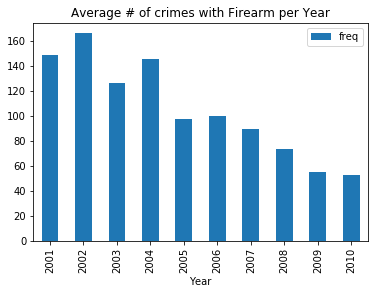

In [39]:
# Plot average number of crimes per year
grouped_firearm.plot.bar(title = "Average # of crimes with Firearm per Year")

# Cleaning up Victim Data

In [11]:
# Generating DataFrame, setting index to the Area Name and replacing NaN values with 0
# Dropping irrelevant columns
df_vic_data = pd.DataFrame(victim_data)
#df_vic_data = df_vic_data.set_index('Area_Name')
df_vic_data.fillna(0, inplace=True)
df_vic_data = df_vic_data.drop(['Victims_Total','Sub_Group_Name'],1)
df_vic_data.reset_index()
df2_vic_data = df_vic_data.rename(columns={"Area_Name": "state"})
df2_vic_data

,state,Year,Group_Name,Victims_Above_50_Yrs,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,0.0,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,67.0,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2.0,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,11.0,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,12.0,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,3.0,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,63.0,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,14.0,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,1.0,0.0,0.0,0.0,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,26.0,9.0,57.0,8.0,132.0,131.0


In [17]:
prim_key=pd.read_csv('primary_key_db.csv')
df_victim = df2_vic_data.merge(prim_key, on = 'state')
df_victim.set_index('state_id')
#df_victim.to_csv("Victim_Age_Gender.csv")

In [18]:
# Getting rid of irrelevant Total Victims values
df_vic_data_final = df_victim[df_victim["Group_Name"] != 'Murder - Total Victims']
df_vic_data_final.head()

,state,Year,Group_Name,Victims_Above_50_Yrs,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,state_id
0,Andhra Pradesh,2001,Murder - Female Victims,67.0,15.0,38.0,43.0,269.0,175.0,6741
1,Andhra Pradesh,2002,Murder - Female Victims,81.0,17.0,5.0,3.0,371.0,185.0,6741
2,Andhra Pradesh,2003,Murder - Female Victims,74.0,8.0,8.0,12.0,378.0,257.0,6741
3,Andhra Pradesh,2004,Murder - Female Victims,63.0,10.0,13.0,14.0,301.0,254.0,6741
4,Andhra Pradesh,2005,Murder - Female Victims,68.0,7.0,14.0,7.0,324.0,302.0,6741


In [20]:
# Melting DataFrame into Tidy Format, database-friendly format
formatted_vic_df = pd.melt(df_vic_data_final, id_vars=['state','Year','Group_Name','state_id'], value_vars=["Victims_Above_50_Yrs","Victims_Upto_10_15_Yrs","Victims_Upto_10_Yrs","Victims_Upto_15_18_Yrs","Victims_Upto_18_30_Yrs","Victims_Upto_30_50_Yrs"],var_name="Victim_Age_Group",value_name="freq")
formatted_vic_df = formatted_vic_df.sort_values(by=['state'])
formatted_vic_df = formatted_vic_df.set_index('state_id')
formatted_vic_df.head()

,state,Year,Group_Name,Victim_Age_Group,freq
state_id,,,,,
6741,Andhra Pradesh,2001,Murder - Female Victims,Victims_Above_50_Yrs,67.0
6741,Andhra Pradesh,2002,Murder - Female Victims,Victims_Upto_15_18_Yrs,3.0
6741,Andhra Pradesh,2003,Murder - Female Victims,Victims_Upto_15_18_Yrs,12.0
6741,Andhra Pradesh,2004,Murder - Female Victims,Victims_Upto_15_18_Yrs,14.0
6741,Andhra Pradesh,2005,Murder - Female Victims,Victims_Upto_15_18_Yrs,7.0


In [41]:
##### Write output to CSV, UNCOMMENT When needed

#clean_air_data.to_csv('Main_Pollution.csv')
formatted_df3.to_csv("Type_of_Motive.csv")
#formatted_fire_df.to_csv('Murder_By_Firearm.csv')
#formatted_vic_df.to_csv('Victim_Age_Gender.csv')